In [1]:
# using Revise
# path_to_package = "/home/manuel/.julia/dev/PauliPropagation"
# insert!(LOAD_PATH, 1, path_to_package);

using Pkg
Pkg.add(url="https://github.com/MSRudolph/PauliPropagation.jl.git", rev="dev")

In [2]:
using PauliPropagation

In [3]:
θ = 0.1im

0.0 + 0.1im

In [4]:
# the computational basis matrices
rzmat = tomatrix(PauliRotation(:Z, 1), θ)
rxmat = tomatrix(PauliRotation(:X, 1), θ)
rzzmat = tomatrix(PauliRotation([:Z, :Z], [1, 2]), θ)

# the Pauli basis matrices
rzptm = calculateptm(rzmat; heisenberg=false)
rxptm = calculateptm(rxmat; heisenberg=false)
rzzptm = calculateptm(rzzmat; heisenberg=false)

# the Pauli basis transfermaps
rzmap = totransfermap(rzptm)
rxmap = totransfermap(rxptm)
rzzmap = totransfermap(rzzptm);

In [5]:
nq = 8
topology = bricklayertopology(nq)

# the circuit
circuit = Gate[]
append!(circuit, TransferMapGate(rxmap, ii) for ii in 1:nq);
# append!(circuit, TransferMapGate([ii], rzmap) for ii in 1:nq);
# append!(circuit, TransferMapGate(collect(pair), rzzmap) for pair in topology);

In [6]:
pstr = PauliString(nq, :I, 1)
psum = PauliSum(pstr)

PauliSum(nqubits: 8, 1 Pauli term: 
 1.0 * IIIIIIII
)

In [7]:
nls = 100
overlaps = Float64[overlapwithplus(psum) / sqrt(2^nq)]
for _ in 1:nls
    psum = propagate!(circuit, psum)
    mult!(psum, 1/norm(psum))
    push!(overlaps, overlapwithplus(psum) / sqrt(2^nq))
end

In [8]:
using Plots

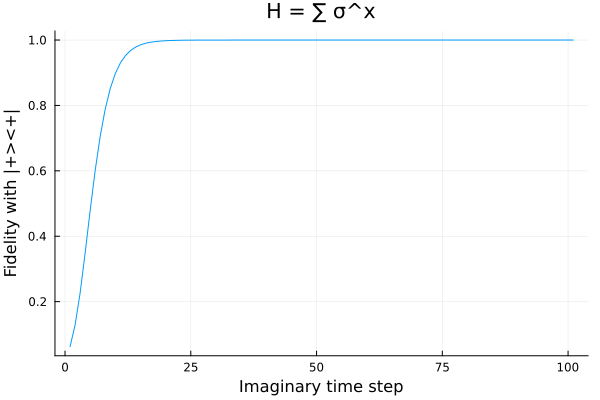

In [9]:
plot(overlaps, ylabel="Fidelity with |+><+|", xlabel="Imaginary time step", label="", title="H = ∑ σ^x")